# Machine Learning with the Diamond Dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

## Data Preparation and Exploration

In [2]:
# Load the diamond dataset from seaborn
import seaborn as sns
diamonds = sns.load_dataset('diamonds')

print("Dataset shape:", diamonds.shape)
print("\nFirst few rows:")
diamonds.head()

Dataset shape: (53940, 10)

First few rows:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print("\nDataset info:")
diamonds.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
print("\nBasic statistics:")
diamonds.describe()


Basic statistics:


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Preprocessing
Deal with categorical feature for regression models

In [5]:
diamonds["clarity"]

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [6]:
s = diamonds["clarity"]

In [7]:
# Define the desired order
desired_order = s.dtype.categories

# Create a mapping dictionary
custom_mapping = {category: idx for idx, category in enumerate(reversed(desired_order))}
print("Custom mapping:", custom_mapping)

# Apply mapping manually
diamonds['clarity_encoded'] = diamonds['clarity'].map(custom_mapping)

Custom mapping: {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}


In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [9]:
X = diamonds[['carat', 'depth', 'clarity_encoded']]
X.head()

,carat,depth,clarity_encoded
0,0.23,61.5,1
1,0.21,59.8,2
2,0.23,56.9,4
3,0.29,62.4,3
4,0.31,63.3,1


In [10]:
y = diamonds['price']
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

## Train-Test Split and Scaling
Note that when performing the scaling, the mean and variance should be computed using the training set and not the whole set to avoid data leakage.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale numerical features (carat and depth)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only numerical columns (not clarity_encoded)
numerical_cols = ['carat', 'depth']
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled training data sample:")
print(X_train_scaled.head())

Training set: (43152, 3)
Test set: (10788, 3)
Scaled training data sample:
          carat     depth clarity_encoded
26546  2.560056 -2.550748               1
9159   0.447392 -1.220426               1
14131  0.637532  0.529996               3
15757  1.482597 -0.170173               1
24632  1.524851  0.249928               4


## Model Training and Evaluation

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

In [14]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'LGBM': LGBMRegressor()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    
    # Choose appropriate data (scaled for Linear Regression and KNN)
    if name in ['Linear Regression', 'K-Nearest Neighbors']:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test
    
    # Train model
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    
    # Calculate metrics
    mse = np.mean((y_test - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.sum(np.abs(y_test - y_pred))
    
    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'predictions': y_pred
    }
    
    print(f"{name} Results:")
    print(f"  RMSE: ${rmse:.2f}")
    print(f"  MAE: ${mae:.2f}")


Training Linear Regression...
Linear Regression Results:
  RMSE: $1346.69
  MAE: $9740641.84

Training K-Nearest Neighbors...
K-Nearest Neighbors Results:
  RMSE: $1047.61
  MAE: $6083245.00

Training Decision Tree...
Decision Tree Results:
  RMSE: $1195.14
  MAE: $6386922.74

Training LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 3
[LightGBM] [Info] Start training from score 3939.490707
LGBM Results:
  RMSE: $974.88
  MAE: $5709815.66


## Visualization

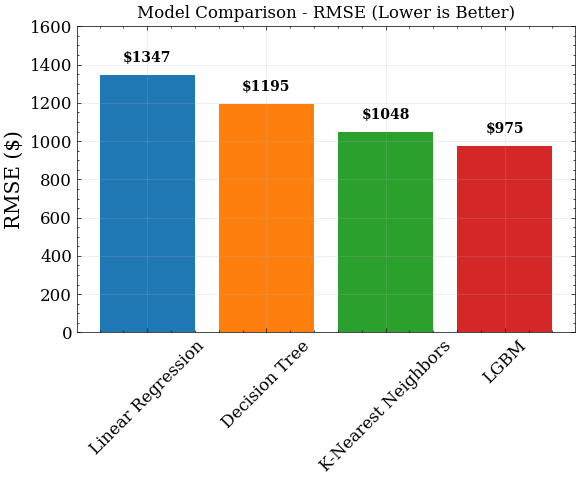

In [15]:
plt.figure(figsize=(6, 5))
# Prepare data for comparison
comparison_names = ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbors', 'LGBM']
rmse_scores = [results[name]['rmse'] for name in comparison_names]

# RMSE comparison
bars1 = plt.bar(comparison_names, rmse_scores, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title('Model Comparison - RMSE (Lower is Better)')
plt.ylabel('RMSE ($)')
plt.tick_params(axis='x', rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, 1600)
plt.tight_layout()
plt.show()

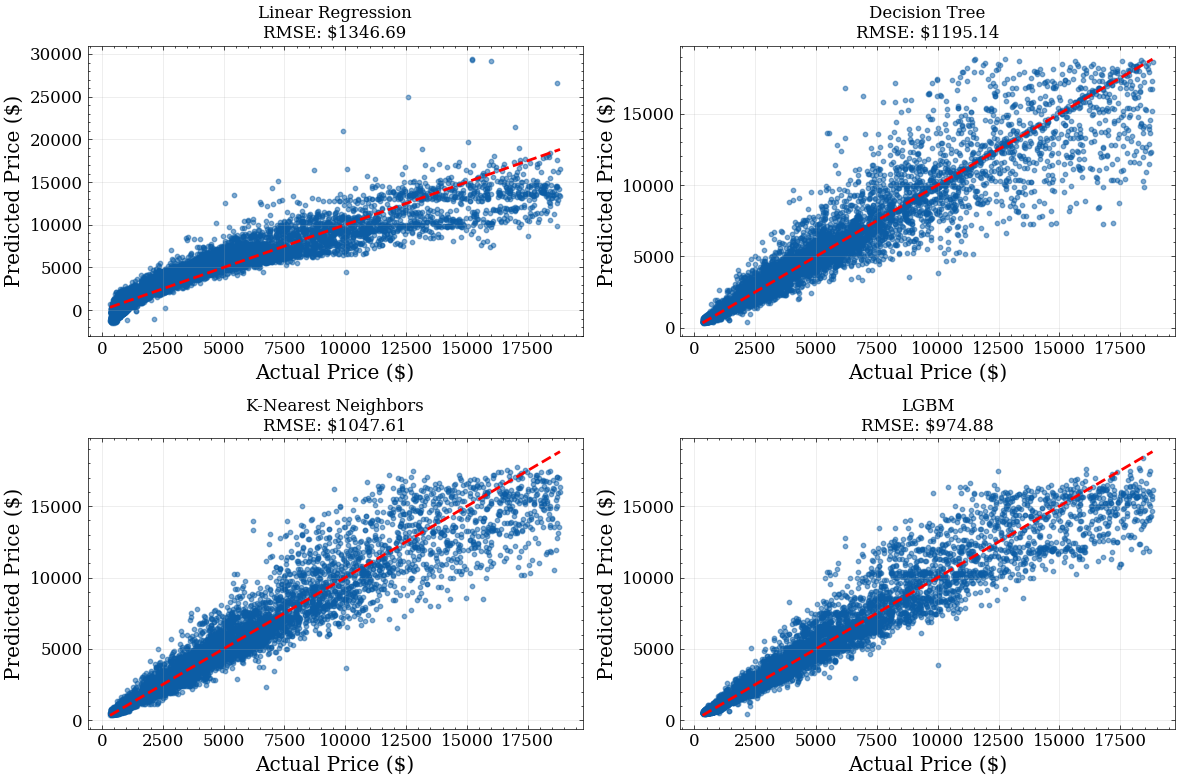

In [16]:
# Actual vs Predicted for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, name in enumerate(comparison_names):
    y_pred = results[name]['predictions']
    
    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=10)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Price ($)')
    axes[idx].set_ylabel('Predicted Price ($)')
    axes[idx].set_title(f'{name}\nRMSE: ${results[name]["rmse"]:.2f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()